### ―――――――――――――――――――――――――――――――――――――――――――――――――――
### BİLGİLER
### Öğrenci Adı Soyadı:    Buğra İLCİ
### Öğrenci Numarası:      180101038
### Üniversite / Bölüm:     Yalova Üniversitesi - Bilgisayar Mühendisliği
### ―――――――――――――――――――――――――――――――――――――――――――――――――――

# 1. Aşama - Kurulum ve Veri Setinin İndirilmesi

### 1.1 Veri Seti

###    Projemde 2013 yılında düzenlenen "Kaggle Machine Learning" yarışmasında kullanılan Dogs vs Cats veri setini kullandım. https://www.kaggle.com/c/dogs-vs-cats/data

Bu veri seti yaklaşık 23.000 adet veriden oluşmakta, 11.500 adet Kedi resmi ve 11.500 adet köpek resmi.

Fakat bu veri setini Microsoft sağlayıcısını kullanarak indirdim. https://www.microsoft.com/en-us/download/details.aspx?id=54765

### 1.2 Kurulum

Kurulum yaparken,
#### Python - How to install KERAS library in Anaconda ? (https://www.youtube.com/watch?v=MIkZ6cDE53w)
adlı videodan yararlandım ve gerekli kütüphanelerin kurulumlarını Anaconda Prompt(CMD) ile gerçekleştirdim.
#### Kurduklarım ve kullandıklarım:

-conda install -c anaconda keras  (Keras Kullandım)

-conda install jupyter            (Jupyter Notebook Kullandım)

-conda install matplotlib         (Verileri görselleştirmek için bir kütüphane)

-conda install pandas             (Verilerle çalışmayı kolay hale getiren bir Python kütüphanesi)

-pip install opencv-python (Opencv-python açık kaynak kodlu görüntü işleme kütüphanesidir.)

# 2. Aşama - Veri Setinin ve Modelin(CNN) oluşturulması

### 2.1 Kütüphanelerin koda eklenmesi

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

#### **Kedi ve Köpek Verilerin bulunduğu 786M ZIP dosyasının indirilmesi**

In [ ]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

Gerçek dünyadan alınmış büyük bir veri seti ile uğraşırken aralarda kalitesiz ve bozuk resimlerin olma olasılığı yüksek. Bu yüzden bu resimleri filtreleyip silmemiz gerekiyor ki modelimiz çok daha başarılı olabilsin.

In [ ]:
#Bu aşamayı daha önce test ederken yapmıştım. Kodu yinede paylaşmak istedim.
"""
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)
"""
#Bu aşamadan sonra yaklaşık 1300 adet resim silinmiş oldu.

### 2.2 Resimler filtrelendikten sonra bu resimleri farklı bir şekilde dosyaladım.
#### Training için dosyalama
<br>./Basedata/Training/Cats
<br>./Basedata/Training/Dogs
#### Validation için dosyalama
<br>./Basedata/Validation/Cats
<br>./Basedata/Validation/Dogs
#### Testing için dosyalama (Burada rastgele seçtiğim kedi ve köpek resimleri bulunmakta.)
<br>./Basedata/Testing/

***

İlk olarak resimlerimi kontrol ettim.

In [2]:
img = image.load_img("basedata/training/cat/213.jpg")

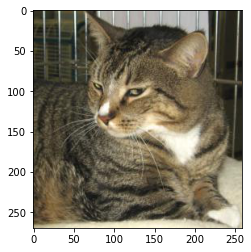

In [3]:
plt.imshow(img)

Resimleri başarı ile çekebildikten sonra 3 boyutlu matris verisini görüntüledim.

In [4]:
cv2.imread("basedata/training/cat/213.jpg")

array([[[ 44,  53,  57],
        [ 44,  53,  57],
        [ 42,  53,  57],
        ...,
        [ 59,  61,  61],
        [ 45,  44,  46],
        [ 31,  30,  32]],

       [[ 44,  53,  57],
        [ 44,  53,  57],
        [ 42,  53,  57],
        ...,
        [ 58,  60,  60],
        [ 45,  44,  46],
        [ 30,  32,  33]],

       [[ 43,  52,  55],
        [ 43,  52,  55],
        [ 41,  53,  55],
        ...,
        [ 55,  60,  59],
        [ 45,  44,  46],
        [ 32,  34,  35]],

       ...,

       [[122, 157, 167],
        [129, 164, 174],
        [136, 171, 181],
        ...,
        [170, 199, 208],
        [171, 203, 214],
        [177, 209, 220]],

       [[133, 168, 178],
        [136, 171, 181],
        [140, 175, 185],
        ...,
        [172, 201, 210],
        [173, 205, 216],
        [178, 210, 221]],

       [[138, 173, 183],
        [139, 174, 184],
        [141, 176, 186],
        ...,
        [175, 204, 213],
        [174, 206, 217],
        [178, 210, 221]]

Aşağıdaki kodda resmimizin boyutlarını görebiliriz (px)

In [5]:
cv2.imread("basedata/training/cat/213.jpg").shape

(270, 259, 3)

Burada resmimizin boyutlarını görebiliyoruz. Uzunluğu 270px, genişliği 259px ve RGB bir resim olduğunu belirten 3 rakamı.

### 2.3 Training ve Validation'da kullanılacak veri setinin oluşturulması.

In [6]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

Resimler RGB olduğu için ve RGB verisi 0-255 arasında olduğu için 1/255 olarak boyutlandırdık.

#### Resimleri sinir ağına (neural network) eklemek için yazılan kod

In [7]:
train_dataset = train.flow_from_directory("basedata/training" ,
                                         target_size = (300,300),
                                         batch_size = 100,
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory("basedata/validation" ,
                                         target_size = (300,300),
                                         batch_size = 100,
                                         class_mode = 'binary')

Found 23422 images belonging to 2 classes.
Found 23422 images belonging to 2 classes.


Toplamda 23422 adet resim buldu ve 2 adet sınıfa ayırdı, Kedi ve Köpek
***
Target size;
<br>Sinir ağımıza birden farklı boyutta matris veremeyiz, her matrisin aynı boyutta olması lazım. 
<br> Bazı veriler 250x200, bazıları 300x400, kimisi ise 500x650 boyutlarında.
<br> Bu yüzden boyutlarını tahminimce ortası olan 300x300 olarak ayarladım.
***
Batch_size 'ı elimde yaklaşık 23.000 adet veri olduğu için ve bilgisayar hafızasını çok zorlamamak için 100 yaptım.
***
Class_mode 'u binary ayarlamamın sebebi kedi ve köpekleri karşılaştırmam. İki adet sonuç olduğu için 0 ve 1 olan binary'i kullandım.
***

#### Ardından oluşan sınıfları kontrol ettim.

In [8]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

### 2.4 Modelin (Convolutional Neural Network) oluşturulması

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(32,(3, 3), activation='relu',),
    tf.keras.layers.MaxPool2D((2, 2)),
    ##
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### Oluşturulan modelin compile edilmesi.

In [11]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics=['accuracy'])

### 2.5 Modelin Eğitilmesi

In [12]:
model_fit = model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 235 steps, validate for 235 steps
Epoch 1/10
235/235 [==============================] - 588s 3s/step - loss: 1.2110 - accuracy: 0.6605 - val_loss: 0.5966 - val_accuracy: 0.6766
Epoch 2/10
235/235 [==============================] - 567s 2s/step - loss: 0.5121 - accuracy: 0.7626 - val_loss: 0.5428 - val_accuracy: 0.7028
Epoch 3/10
235/235 [==============================] - 528s 2s/step - loss: 0.3839 - accuracy: 0.8314 - val_loss: 0.2364 - val_accuracy: 0.9147
Epoch 4/10
235/235 [==============================] - 532s 2s/step - loss: 0.2461 - accuracy: 0.9020 - val_loss: 0.1119 - val_accuracy: 0.9725
Epoch 5/10
235/235 [==============================] - 535s 2s/step - loss: 0.1464 - accuracy: 0.9489 - val_loss: 0.0466 - val_accuracy: 0.9918
Epoch 6/10
235/235 [==============================] - 541s 2s/step - loss: 0.1190 - accuracy: 0.9676 - val_loss: 0.0458 - val_accuracy: 0.9868
Epoch 7/10
235/235 [============================

***
Modelin eğitimi yaklaşık 90 dakika sürdü. Elimde 23000 adet resim olması, milyonlarca RGB verisi ve yüksek miktarda katman olması sebebiyle uzun sürmüş olabilir.

Bilgisayarımdan ötürü sıkıntı olduğunu düşünmüyorum çünkü en yeni sistemlerden birine sahibim;
İşlemci = Ryzen 9 5900X
Ekran kartı = Nvidia RTX 3080
RAM = 32 GB 3600 MHz CL 16

#### Eğitimden sonra oluşan çıktıların kontrol edilmesi.

In [17]:
validation_dataset.class_indices

{'cat': 0, 'dog': 1}

# 3. Aşama - Modelin Test Edilmesi

#### Modelin testi ve sonuçlar

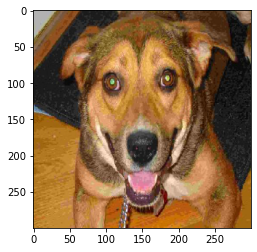

↑ It is a DOG ↑


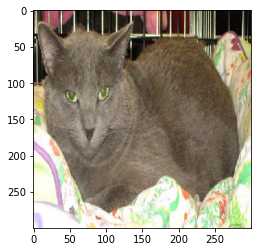

↑ It is a CAT ↑


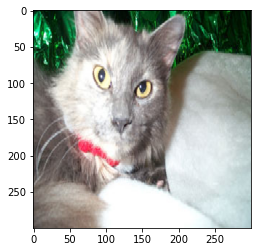

↑ It is a CAT ↑


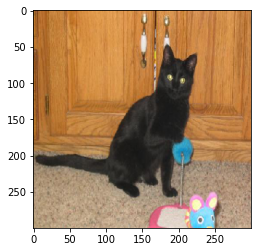

↑ It is a CAT ↑


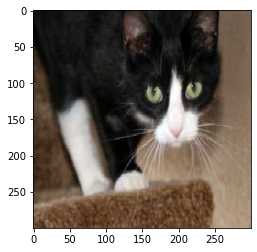

↑ It is a DOG ↑


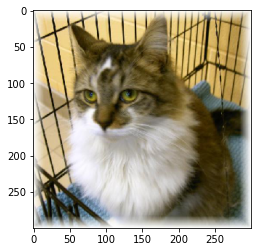

↑ It is a CAT ↑


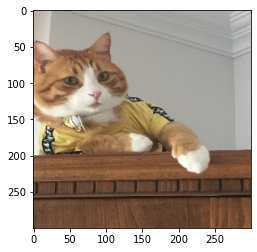

↑ It is a CAT ↑


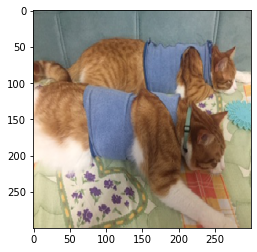

↑ It is a DOG ↑


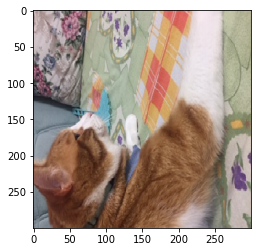

↑ It is a DOG ↑


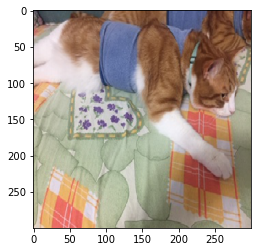

↑ It is a DOG ↑


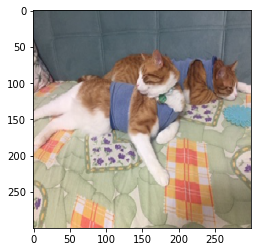

↑ It is a DOG ↑


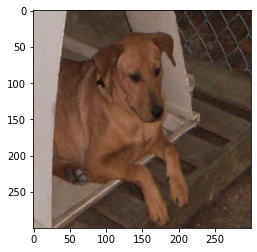

↑ It is a DOG ↑


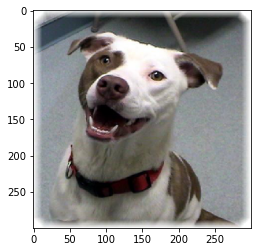

↑ It is a DOG ↑


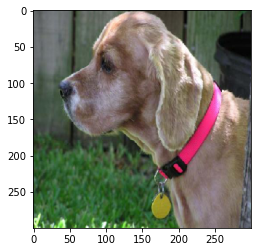

↑ It is a DOG ↑


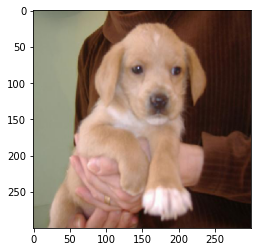

↑ It is a DOG ↑


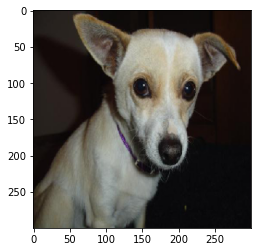

↑ It is a DOG ↑


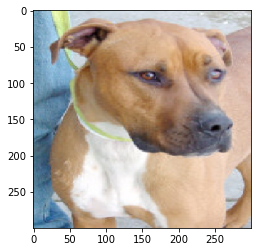

↑ It is a DOG ↑


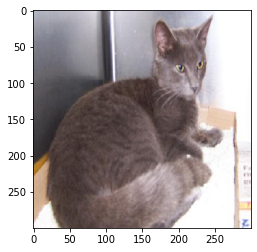

↑ It is a CAT ↑


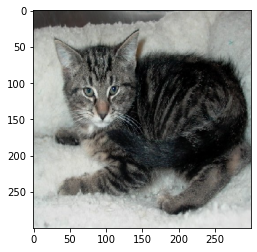

↑ It is a CAT ↑


In [28]:
dir_path = 'basedata/testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(300,300))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("↑ It is a CAT ↑")
    else:
        print("↑ It is a DOG ↑")